In [15]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


In [16]:
df_spotify_numerical = pd.read_csv('..\\data\\5_spotify_numerical.csv')

In [17]:
df_spotify_numerical.head()

,release_date,popularity,duration_ms,explicit,"""childrens music","""mans orchestra","""punk n roll","""womens music",21st century classical,abstract,...,yacht rock,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco
0,2008,14,150040,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004,1,253000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,3,240400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007,1,138760,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,0,199986,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_spotify_numerical)

scaled_df = pd.DataFrame(scaled_data, columns=df_spotify_numerical.columns)

scaled_df.to_csv('..\\data\\6_spotify_numerical_scaled.csv', index=False)

with open("..\\scaler\spotify_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\manht\AppData\Local\Temp\ipykernel_23416\246715298.py:8: SyntaxWarning: invalid escape sequence '\s'
  with open("..\\scaler\spotify_scaler.pkl", "wb") as f:


In [21]:
scaled_df

,release_date,popularity,duration_ms,explicit,"""childrens music","""mans orchestra","""punk n roll","""womens music",21st century classical,abstract,...,yacht rock,ye ye,yodeling,zarzuela,zilizopendwa,zolo,zouglou,zouk,zouk riddim,zydeco
0,0.588245,0.083373,-0.812339,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
1,0.295453,-0.718070,0.160774,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
2,0.807839,-0.594771,0.041687,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
3,0.515047,-0.718070,-0.918951,3.829574,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
4,1.613016,-0.779720,-0.340281,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,0.515047,-0.779720,0.071298,3.829574,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
5056,-1.680891,0.268321,1.813376,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,17.223445,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
5057,0.295453,1.378012,-0.915426,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527
5058,1.466620,-0.718070,0.397305,-0.261126,-0.024356,-0.03722,-0.019885,-0.014059,-0.014059,-0.014059,...,-0.058060,-0.062994,-0.03722,-0.014059,-0.05806,-0.054527,-0.014059,-0.042212,-0.028127,-0.054527


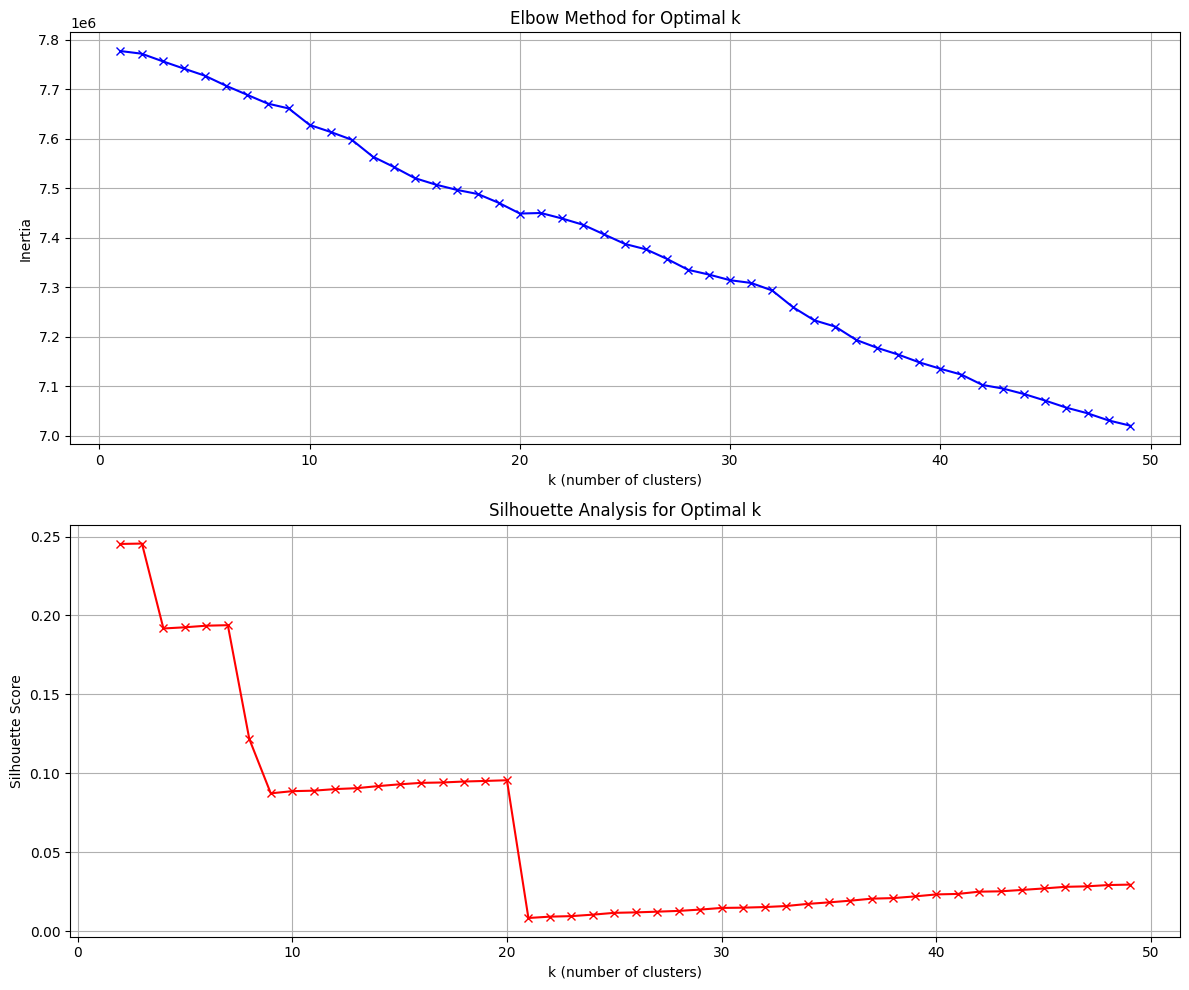


Silhouette Analysis Results:
Optimal k according to highest silhouette score: 3
Maximum silhouette score:  0.246

Elbow Method Results:
Optimal k according to the elbow method: 20
Inertia at the elbow point: 7448981.088631552


In [20]:
k_range = range(1, 50)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

    if k >=2:
        cluster_labels = kmeans.predict(scaled_df)
        silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(k_range, inertias, "bx-")
ax1.set_xlabel("k (number of clusters)")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method for Optimal k")
ax1.grid(True)

ax2.plot(list(k_range)[1:], silhouette_scores, "rx-")
ax2.set_xlabel("k (number of clusters)")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Analysis for Optimal k")
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\nSilhouette Analysis Results:")
optimal_k_silhouette = list(k_range)[1:][np.argmax(silhouette_scores)]
print(f"Optimal k according to highest silhouette score: {optimal_k_silhouette}")
print(f"Maximum silhouette score: {max(silhouette_scores): .3f}")

second_derivative = np.diff(np.diff(inertias))
elbow_k =  k_range[np.argmax(second_derivative) +1]
print(f"\nElbow Method Results:")
print(f"Optimal k according to the elbow method: {elbow_k}")
print(f"Inertia at the elbow point: {inertias[elbow_k - 1]}")


